In [1]:
import torch
device  = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.cuda.is_available()

False

In [2]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models.segmentation import deeplabv3_resnet50
from torchvision.models import resnet50
from torchvision.models import densenet161
from PIL import Image
import numpy as np
import torchvision.transforms as transforms

In [3]:
# model = deeplabv3_resnet50(pretrained=True, progress=False)
image = Image.open('Samples/Snowman.png')
transform = transforms.ToTensor()
model = densenet161(pretrained=True)
target_layers = [model.features[-1]]
input_tensor =transform(image)
input_tensor = torch.unsqueeze(input_tensor,0)



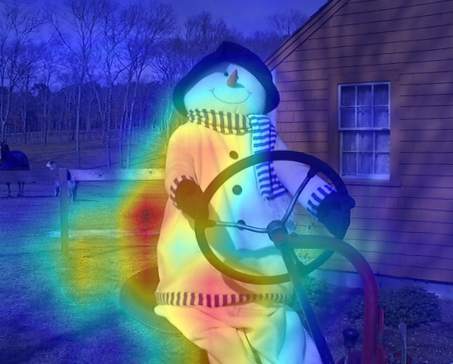

In [4]:
grad_cam = GradCAM(model=model, target_layers=target_layers)
grad_grayscale_cam = grad_cam(input_tensor=input_tensor)
grad_grayscale_cam = grad_grayscale_cam[0, :]
rgb_image = np.float32(image) / 255
visualization_1 = show_cam_on_image(rgb_image, grad_grayscale_cam, use_rgb=True)
img = (Image.fromarray(visualization_1))
# img
img

In [11]:
img.save('Snowman_eng_grad.png')